In [17]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import date as date

In [2]:
#Replacing NaN values with zero
lat_range = slice(10.0, 19.0)
lon_range = slice(73.0, 76.0)
values = np.array([]) #Create empty array
for year in range(1980,1986):
    dataset = xr.open_dataset(f"C:\\Users\\ShrirangP\\Downloads\\Rainfall_IMD_025_NETCDF_1951-2023\\RF25_ind{year}_rfp25.nc")
    pune_rf = dataset.sel(LATITUDE=lat_range, LONGITUDE=lon_range)
    sliced = pune_rf['RAINFALL'].sel(TIME=slice(f"{year}-05-01", f"{year}-10-31"))
    rain = sliced.to_series()
    rain = rain.fillna(0)
    days = int(rain.count()/481) #Number of days
    bsize = 481
    averages = np.zeros(days)
    for i in range(days):
        averages[i] = sum(rain.values[i*bsize:(i+1)*bsize])/bsize
    values = np.append(values,averages)
    
print(values.shape)

(1104,)


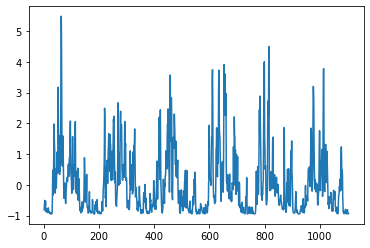

In [3]:
y = values.round(3)
x = np.arange(1,values.shape[0]+1)
ynormed = (y - y.mean())/(y.std())
plt.plot(x,ynormed)

In [48]:
#Removing NaN values
lat_range = slice(15.0, 25.0)
lon_range = slice(70.0, 90.0)
values2 = np.array([]) #Create empty array
for year in range(1980,1986):
    dataset = xr.open_dataset(f"C:\\Users\\ShrirangP\\Downloads\\Rainfall_IMD_025_NETCDF_1951-2023\\RF25_ind{year}_rfp25.nc")
    pune_rf = dataset.sel(LATITUDE=lat_range, LONGITUDE=lon_range)
    t = np.array([])
    dates = pd.date_range(start=f"{year}-05-01",end=f"{year}-10-31")
    for date in dates:
        df = pune_rf['RAINFALL'].sel(TIME=date)
        val = df.to_series()
        val = val.dropna()
        t = np.append(t,val.mean())
    values2 = np.append(values2,t)
print(values2.shape[0])


1104


In [49]:
values2.tofile('C:\\Users\\ShrirangP\\Desktop\\values.csv',sep=',')

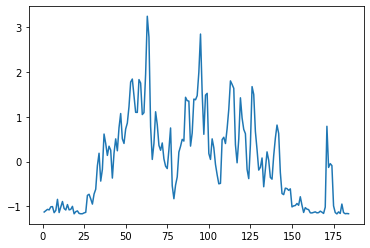

In [39]:
y2 = values2.round(3) #in mm
x = np.arange(1,values2.shape[0]+1) #Days
ynormed2 = (y2 - y2.mean())/(y2.std())
plt.plot(x,ynormed2)

In [40]:
print((ynormed2<-1).sum())

46


In [30]:
print(-y2.mean()/y2.std())
print(y2.std())

-0.9668863042943567
9.287200375001213


In [7]:
dataset = xr.open_dataset("C:\\Users\\ShrirangP\\Downloads\\Rainfall_IMD_025_NETCDF_1951-2023\\RF25_ind2023_rfp25.nc")

In [8]:
lat_range = slice(10.0, 19.0)
lon_range = slice(73.0, 76.0)
pune_rf = dataset.sel(LATITUDE=lat_range, LONGITUDE=lon_range)


In [9]:
test = np.array([])
dates = pd.date_range(start="2023-05-01",end="2023-10-31")
for date in dates:
    df = pune_rf['RAINFALL'].sel(TIME=date)
    val = df.to_series()
    val = val.dropna()
    test = np.append(test,val.mean())
test.round(1)

array([ 1. ,  0.7,  1.5,  0. ,  0.4,  0.2,  1.1,  1.8,  6.8,  4.5,  2.2,
        3.6,  1.4,  0.8,  0.1,  0. ,  0. ,  0.1,  0.2,  0.1,  0.2,  4.5,
        2.5,  2.5,  1.2,  1.2,  0.6,  0.5,  0.5,  5.4,  1.7,  4.7,  0.6,
        0.2,  0.7,  1.9,  0.6,  0.3,  2.5,  1.5,  3.7,  6.6,  5.6,  3.2,
        3.8,  2.3,  0.9,  2.4,  5.6,  2.3,  1.2,  1.9,  2.8,  3.5, 11. ,
       21. , 15.8,  6.2, 25. , 16.4, 18.4, 18.1, 13.7, 23.4, 22.1, 29.8,
       43. , 32.1, 27.1, 16. ,  6.3,  2.9,  3.5, 11.4, 17.8, 11.8,  8.2,
       10.3, 19.3, 36.6, 34.8, 28.6, 31.1, 44.4, 42.8, 40. , 43.1, 35.4,
       22.2, 10. ,  6.2,  6.7, 10.7,  6.1,  4.8,  6. ,  7.5,  6.4,  3.2,
        2.3,  3.4,  2. ,  2.1,  1.3,  1.5,  2.1,  0.5,  0.8,  2. ,  3. ,
        7.3, 10.2,  2.4,  0.8,  1.5,  1.1,  4.8,  7.1,  3.5,  3. ,  3.8,
        1.9,  0.6,  3.7,  4.6,  2.1,  9.4,  4.1,  6. ,  5.6, 14.6, 18.3,
       10.9,  6.6,  6.3,  1.8,  2.9,  6.7,  9.1,  6.3,  6. ,  9. ,  6.3,
        6.4,  9.4,  8. , 12.3,  6.3,  7.3, 15.2, 10

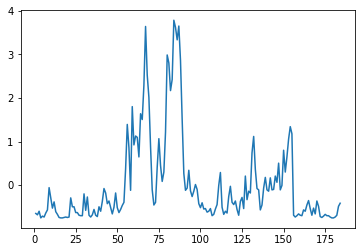

In [10]:
y = test.round(1)
x = np.arange(1,days+1)
ynormed = (y - y.mean())/(y.std())
plt.plot(x,ynormed)

In [80]:
all = pune_rf['RAINFALL'].sel(TIME=slice('2023-05-01','2023-10-31'))
rain2 = all.to_series()
rain2 = rain2.fillna(0)
rain2.count()
days = int(rain2.count()/481) #Number of days
print(days)
bsize = 481
averages = np.zeros(days)
for i in range(days):
    averages[i] = sum(rain.values[i*bsize:(i+1)*bsize])/bsize
averages.round(1)

184


array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.7,  0.8,  0.7,
        0.8,  1.6,  0.6,  0.5,  0.8,  0.3,  0.7,  2.2,  2.9,  1.1,  0.2,
        0.3,  0.2,  1.4,  1.2,  2. ,  5.5,  2.2,  2. ,  1.6,  3.5,  2.9,
        3.4,  3.1,  2.5,  6.3,  7.6,  8.7,  6.6,  7.1,  9. ,  8. ,  5.3,
        5.3,  9.1, 11.5, 16.5, 16.3, 10.6,  5.4,  4.4,  4.7,  6.7, 14.6,
       24.5, 24.4, 21.9, 13.8,  9.1,  6.9,  4.8,  6.6,  4.9,  5.3,  4.2,
        5.7,  6. ,  4.9,  5.6,  4.5,  1.7,  1.7,  2.4,  4. ,  4.2,  7.6,
       13.5, 16. , 13.7,  6.4,  4.5,  8.3, 10.3,  9.4,  9. , 12.4,  8.3,
        6.5,  3.4,  7.4, 16.5, 27.7, 27.9, 14.6,  5.5,  4.4,  4.3,  7.1,
        8.2, 13.4,  9.3,  6. ,  6.5,  7.8, 12. ,  9.7,  6.9,  4.9,  1.8,
        2. ,  2.3,  1.1,  3.3,  2.7,  2.8,  2.1,  2.9,  2.5,  4.1,  3.2,
        3. ,  0.9,  0.6,  0.6,  1. ,  0.5,  1. ,  3.7,  4.6,  3.7,  2.8,
        3.6,  4. ,  4.3,  1.6,  1.2,  0.9,  0.5,  1.3,  0.2,  0.3,  1.2,
        0.1,  0. ,  0.4,  1.6,  3.5,  3.5,  4.1,  5

In [19]:
start = date(2023,5,1)
end = date(2023,10,31)
delta = end - start  #Exclusive of start
print(delta) 

183 days, 0:00:00


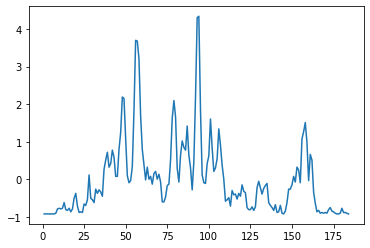

In [11]:
y = averages.round(1)
x = np.arange(1,days+1)
ynormed = (y - y.mean())/(y.std())
plt.plot(x,ynormed)